<a href="https://colab.research.google.com/github/UditSrinivasan/dataScience_learn/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=o2Saturation.csv

# **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

# **Reading Heart.csv**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
# looking at the first 5 rows of our data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.200000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200000,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.000000,1,1,2,0


In [ ]:
print('Number of rows are :-',df.shape[0], ',and number of columns are :-',df.shape[1])

Number of rows are :- 303 ,and number of columns are :- 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observation:**

you can see that there are no missing rows in the entire dataset. so we do not need to fil/drop any value.

All the columns except oldpeak (float) are of int data type.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#counting duplicate 
df.duplicated().sum()

1

There is 1 duplicate row

In [ ]:
df.drop_duplicates(inplace=True)
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 302 ,and number of columns are : 14


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000000,54.420530,9.047970,29.000000,48.000000,55.500000,61.000000,77.000000
sex,302.000000,0.682119,0.466426,0.000000,0.000000,1.000000,1.000000,1.000000
cp,302.000000,0.963576,1.032044,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,302.000000,131.602649,17.563394,94.000000,120.000000,130.000000,140.000000,200.000000
chol,302.000000,246.500000,51.753489,126.000000,211.000000,240.500000,274.750000,564.000000
fbs,302.000000,0.149007,0.356686,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,302.000000,0.526490,0.526027,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,302.000000,149.569536,22.903527,71.000000,133.250000,152.500000,166.000000,202.000000
exng,302.000000,0.327815,0.470196,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,302.000000,1.043046,1.161452,0.000000,0.000000,0.800000,1.600000,6.200000


**Observation:**

The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.

The average heart rate of the group is 152, whereas overall it ranges between 133 to 202.

Age of the group varies from 29 to 77 and the mean age is 55.5

In [ ]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


**Observation:**

There are two sex : 0 and 1

The highest cholestrol level is 564 and the lowest is 126.

Resting Blood Pressure of individuals vary between 94 to 200.

There are 4 types of chest pain.

exercise induced angina has 2 types (1 = yes; 0 = no)

# **EDA**

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


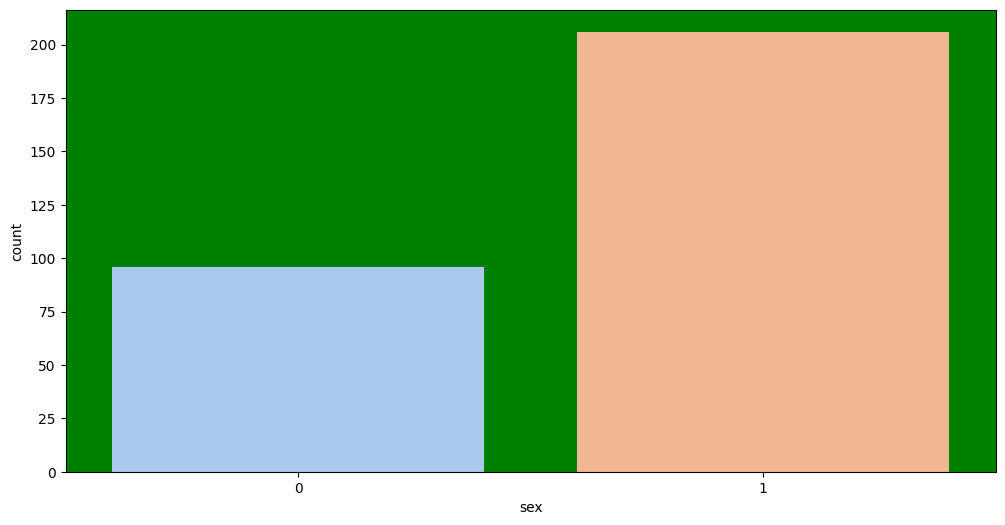

In [ ]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=df, x="sex", palette='pastel')

**Observation:**

The number of people belonging to sex category 0 are 96 whereas 1 are 206.

The number of people in one category are more than double than the zero.

<Axes: xlabel='cp', ylabel='count'>

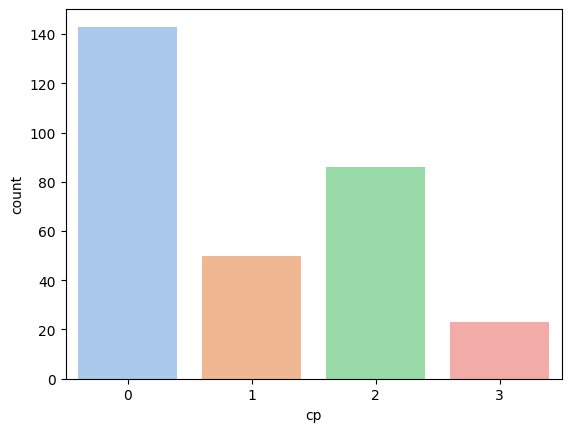

In [16]:
ax=plt.axis()
sns.countplot(x='cp', data=df, palette='pastel')

**Observation:**

cp : Chest Pain type chest pain type

  Value 0: typical angina

  Value 1: atypical angina
  
  Value 2: non-anginal pain
  
  Value 3: asymptomatic

People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

<Axes: xlabel='fbs', ylabel='count'>

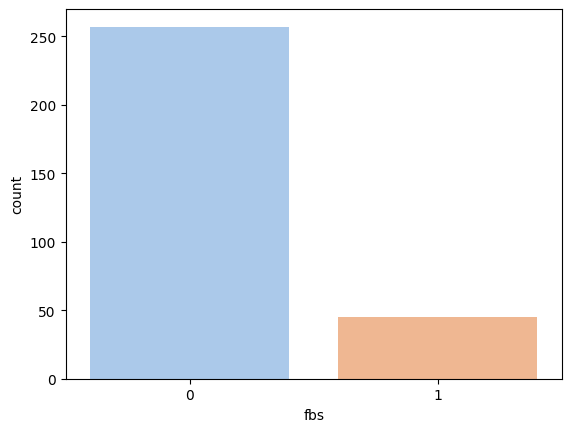

In [17]:
sns.countplot(x='fbs', data=df, palette='pastel')

<Axes: xlabel='thall', ylabel='count'>

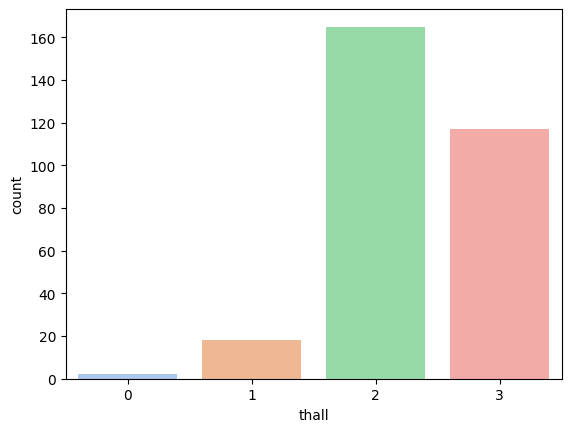

In [18]:
sns.countplot(x='thall', data=df, palette='pastel')

**Observation: **
Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 ) .

<Axes: xlabel='restecg', ylabel='count'>

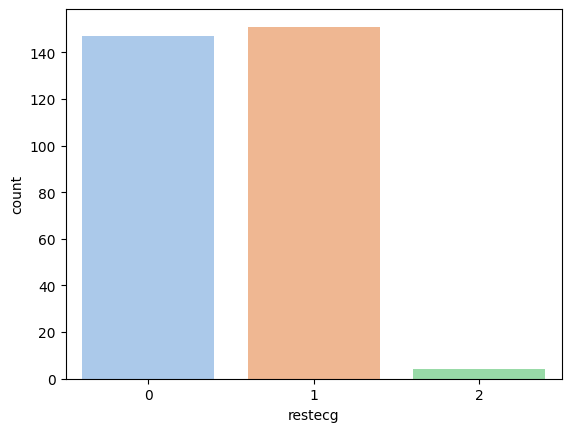

In [19]:
sns.countplot(x='restecg', data=df, palette='pastel')

**Observation:**

ECG count is almost the same for type 0 and 1.

Also, its almost negligible for type 2 in comparision to type 0 and 1.

<Axes: xlabel='caa', ylabel='age'>

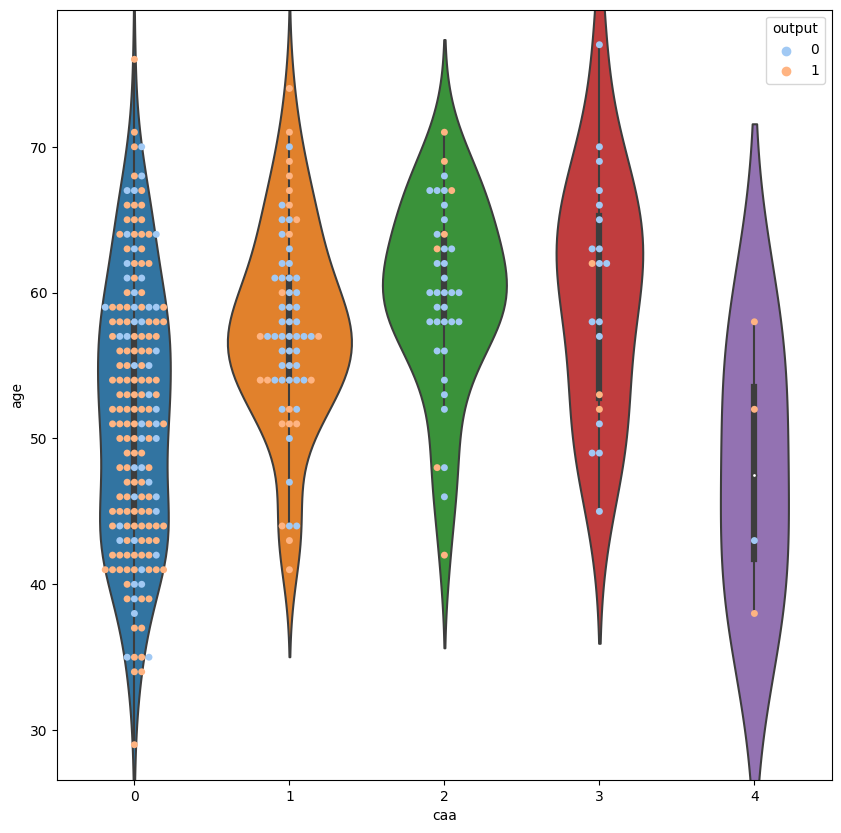

In [20]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

**Observation:**

This swarmplot gives us a lot of information.

Accoring to the figure, people belonging to caa category '0' , irrespective of 
their age are highly prone to getting a heart attack.

While there are very few people belonging to caa category '4' , but it seems 
that around 75% of those get heart attacks.

People belonging to category '1' , '2' and '3' are more or less at similar risk.

# **Unique values**

Counting number of unique value and it's relative with their respective observations between train & test dataset.

In [21]:
integer_features = ['age','chol','trtbps','cp','thall','exng']
unique_values_train = pd.DataFrame(df[integer_features].nunique())
unique_values_train = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features', 'Count']

unique_values_percent_train = pd.DataFrame(df[integer_features].nunique()/df.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']

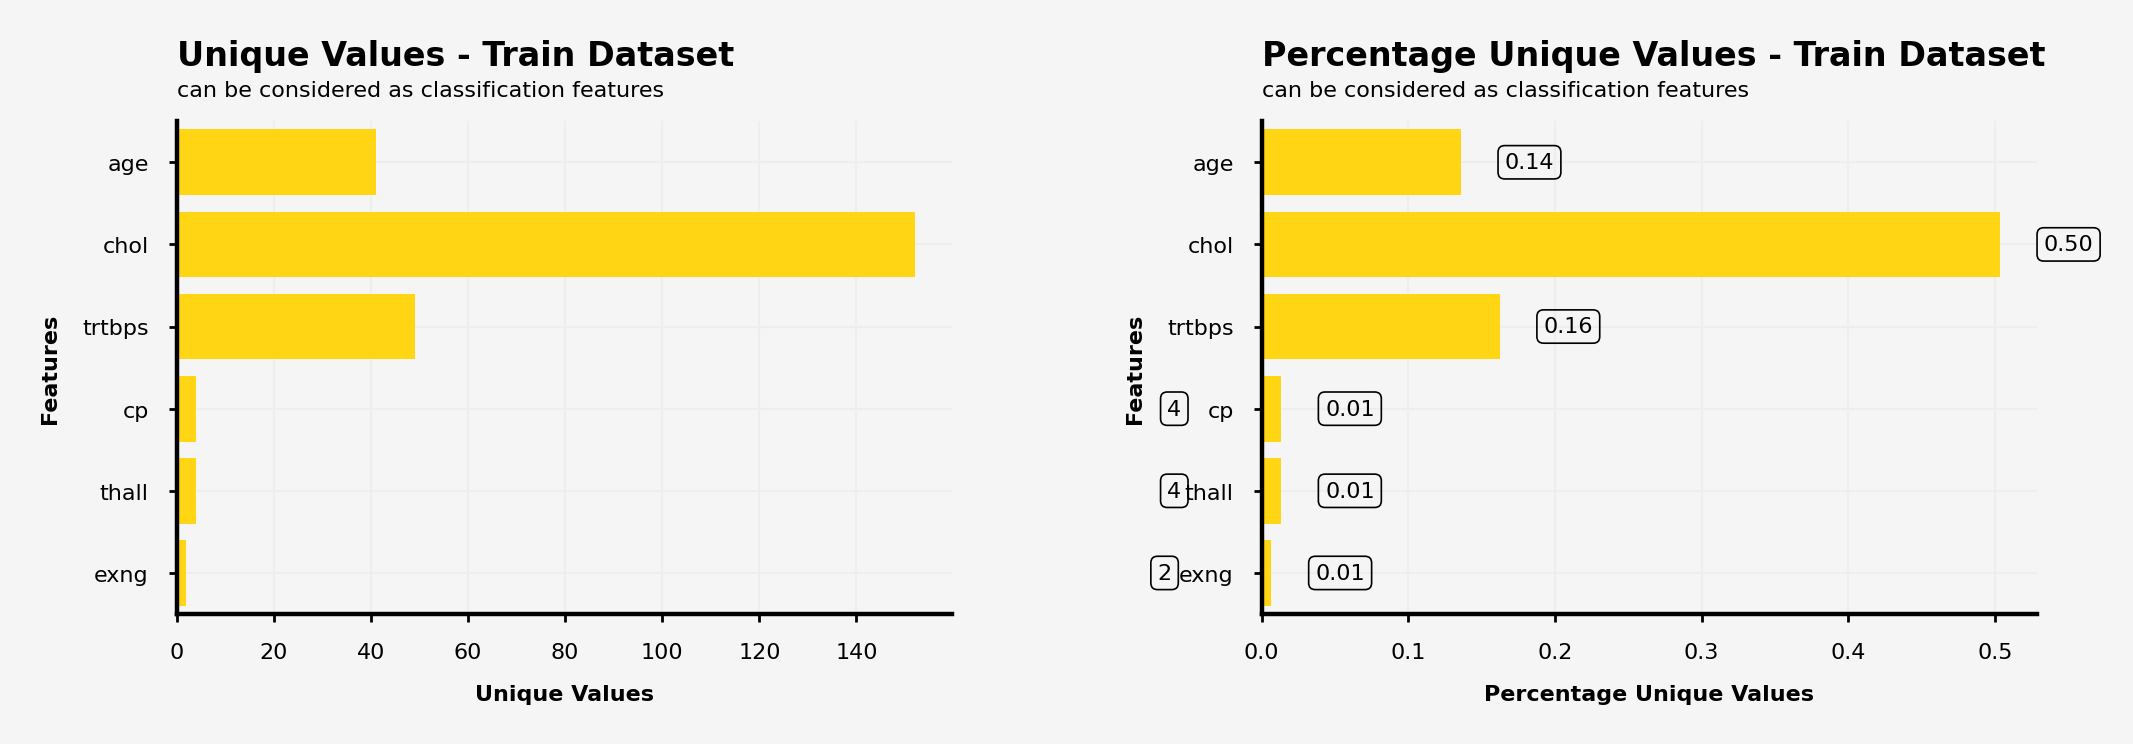

In [22]:
plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*6)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.5, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1, 'can be considered as classification features', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 200
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.5, 'Percentage Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1, 'can be considered as classification features', fontsize=4, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*6)

**Observations:**

It seems num feature can be treated as classification features as the unique numbers is small compared with the total observation which can be seen on the percentage to the total observations.

# **Distribution**
Showing distribution on each feature that are available in train dataset.

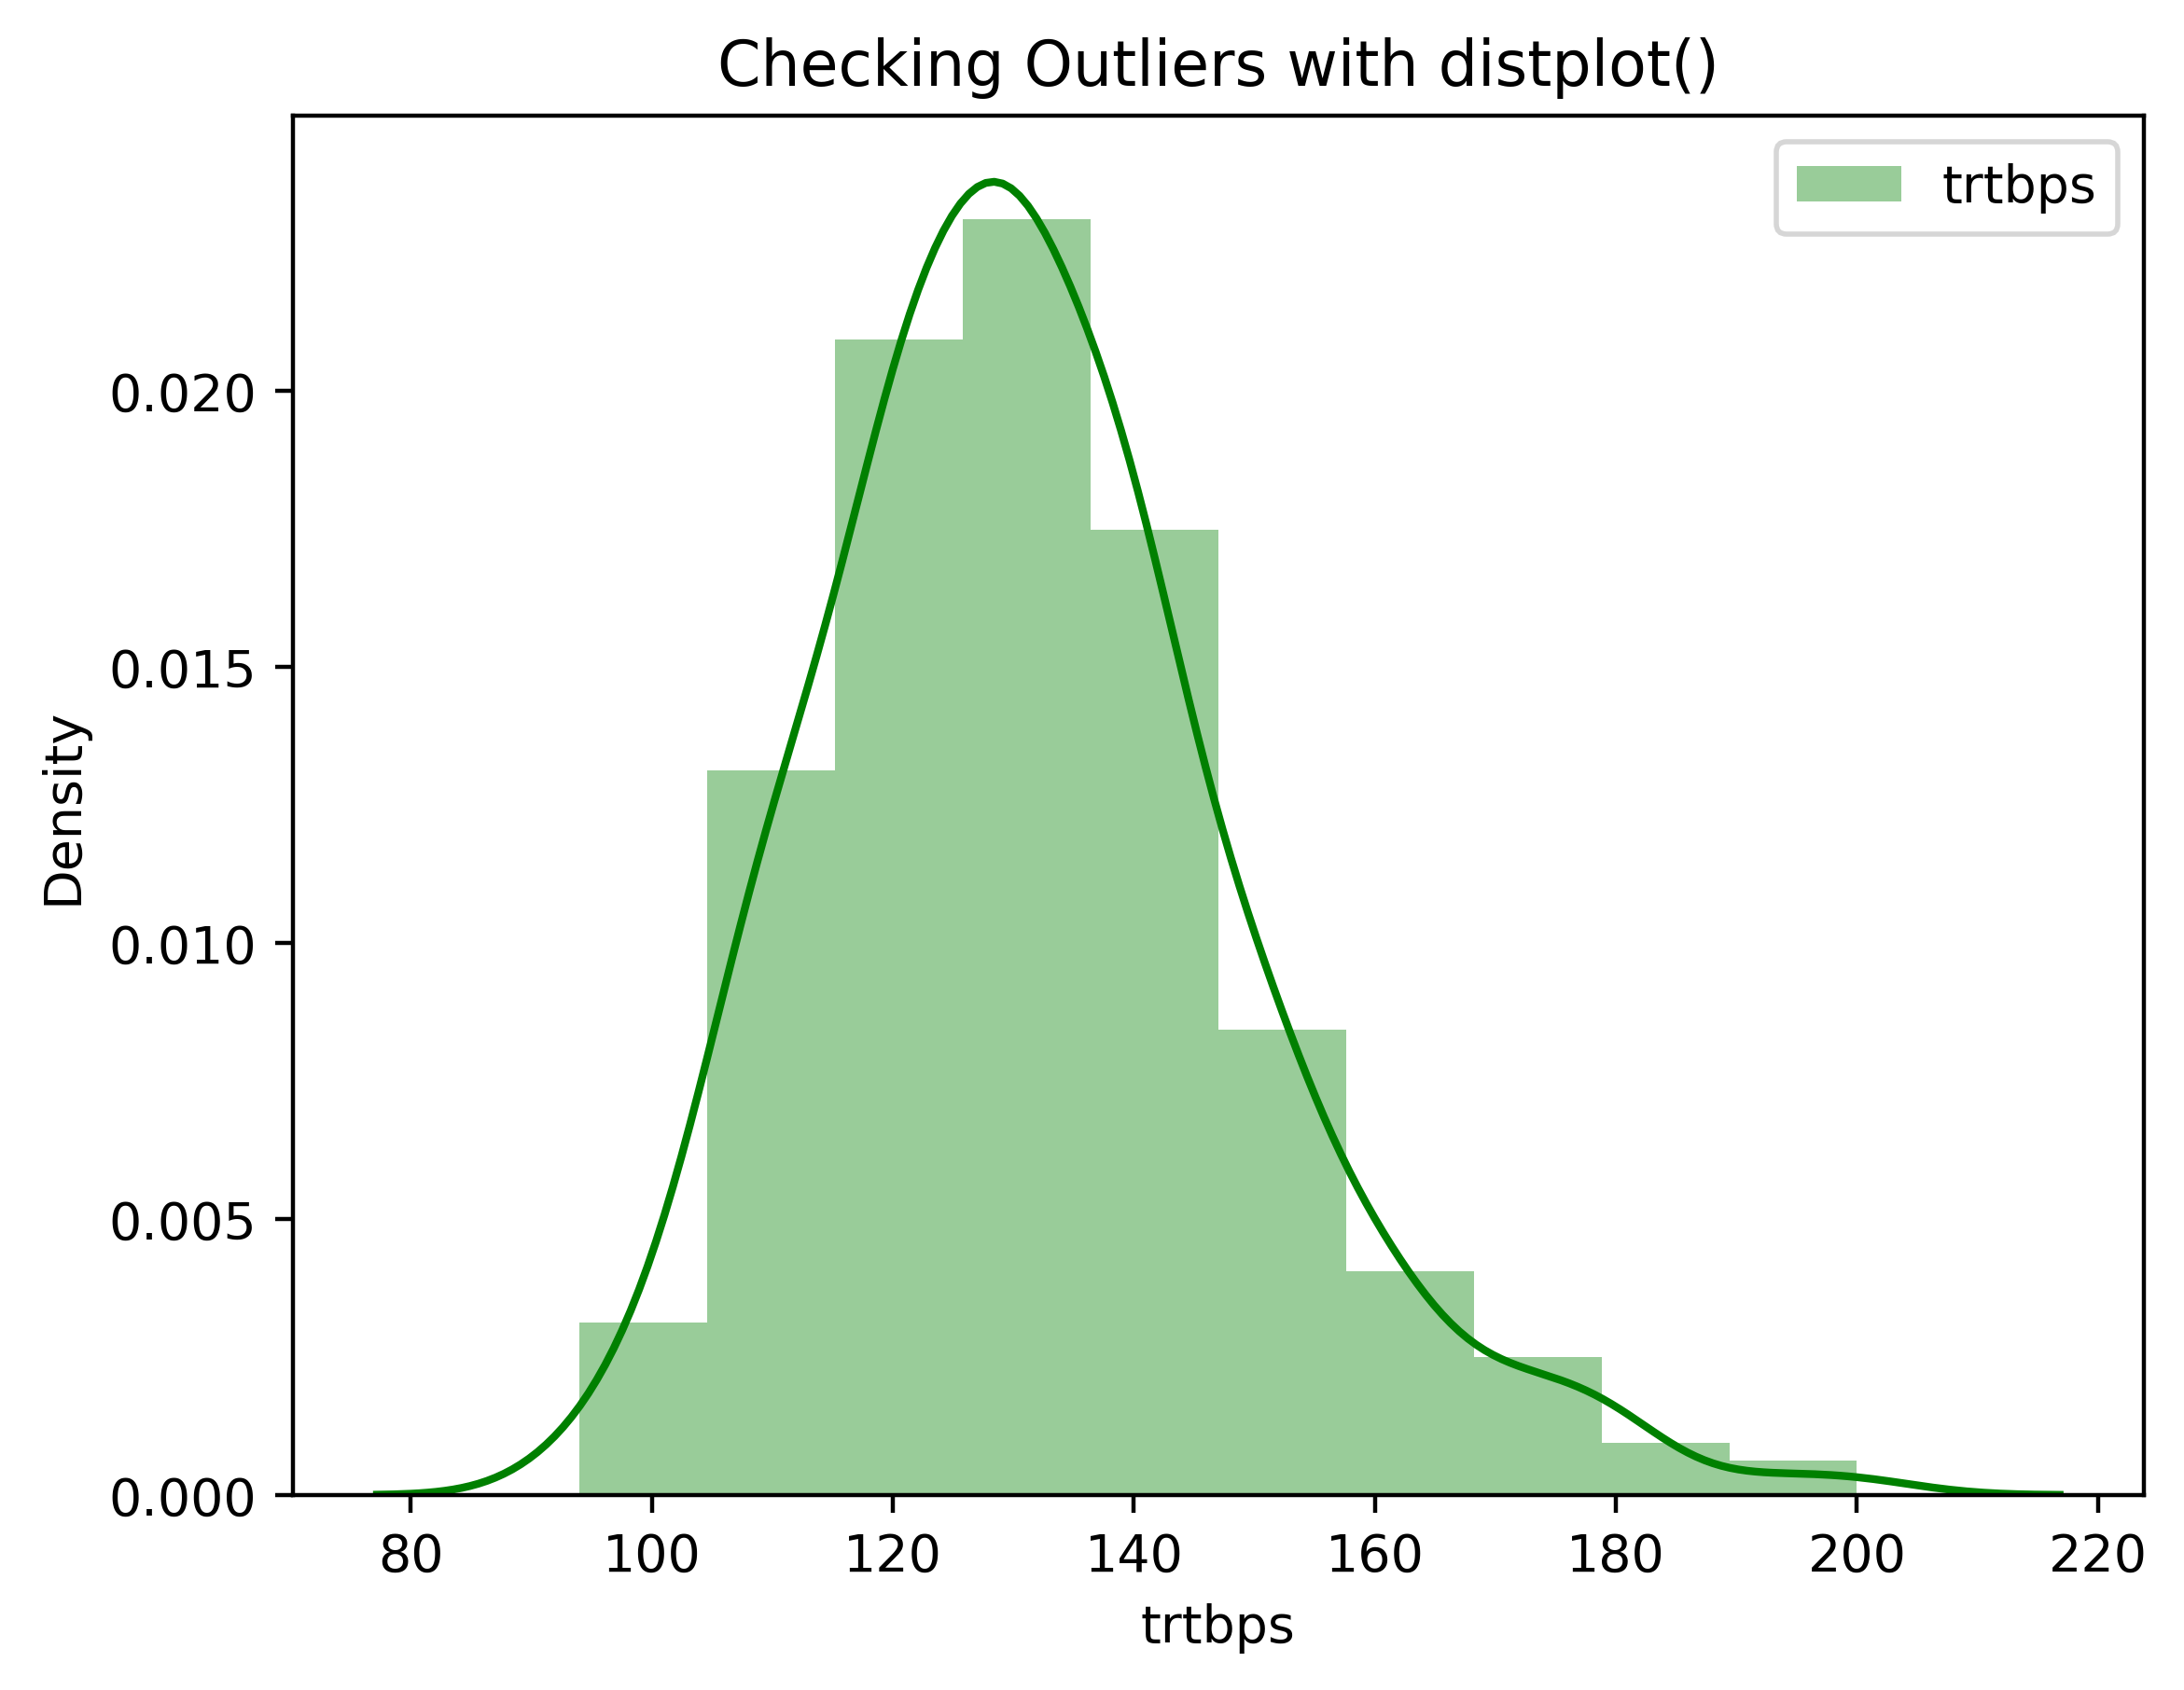

In [23]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

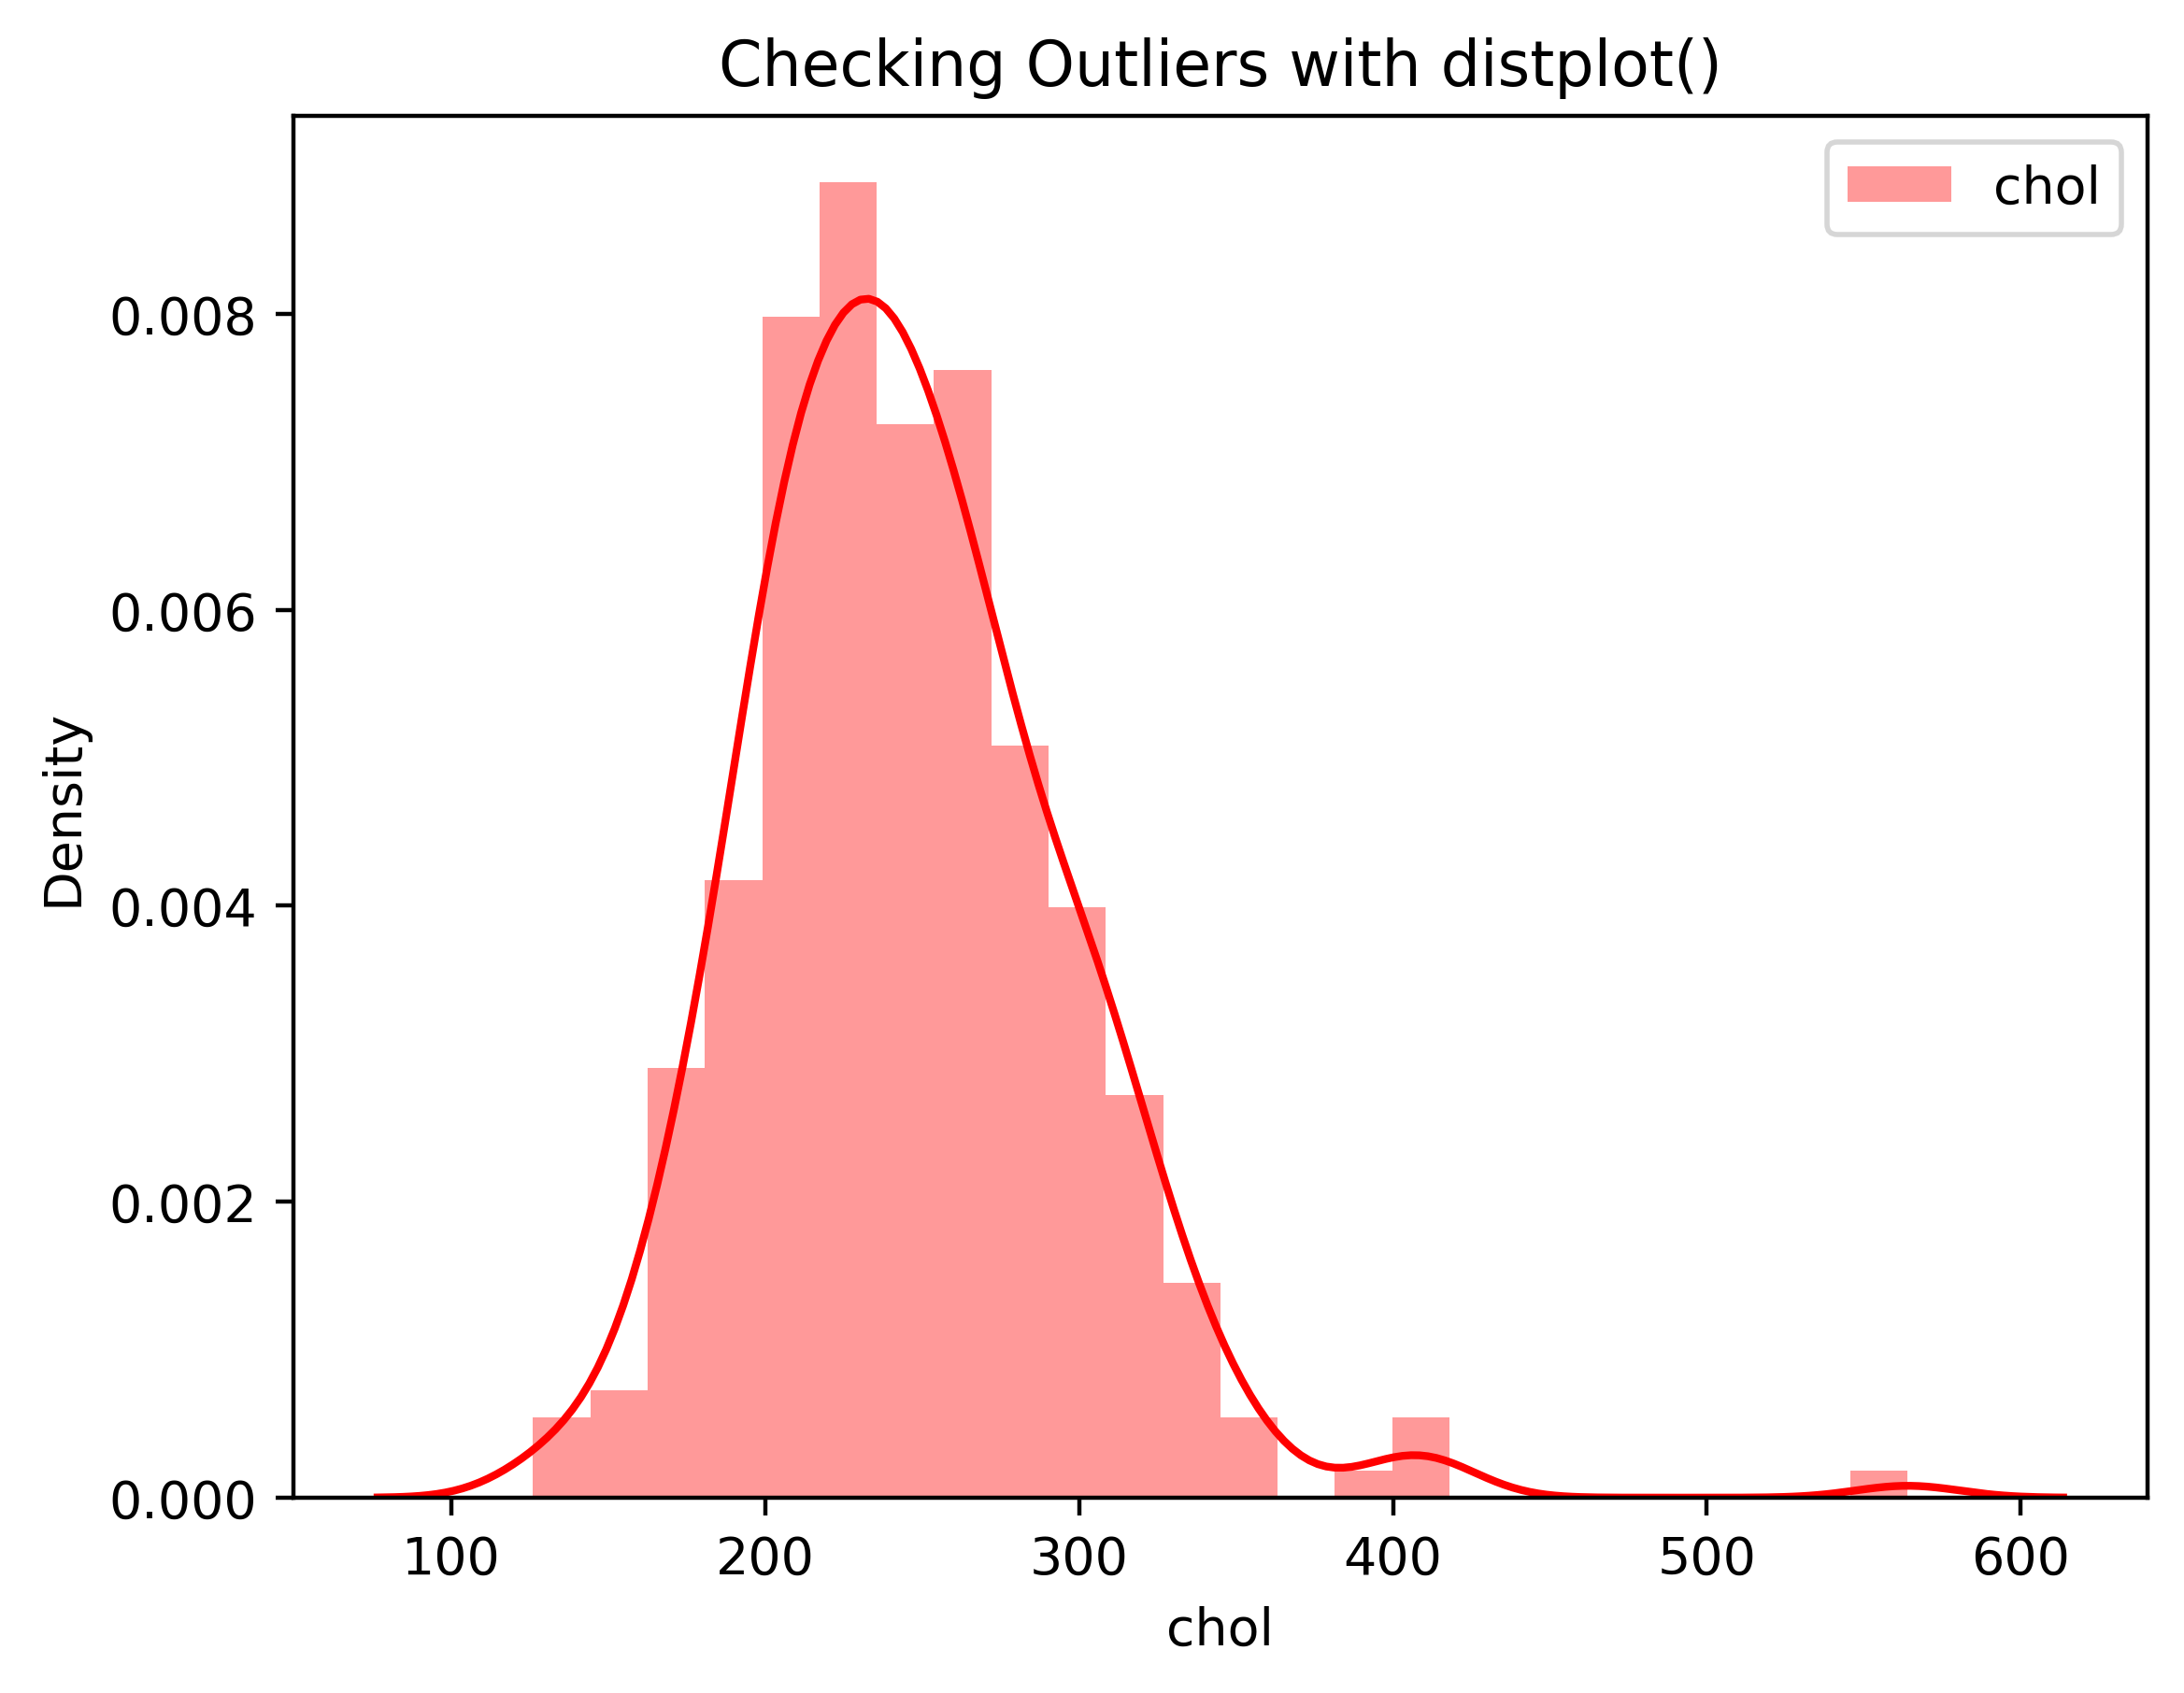

In [24]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

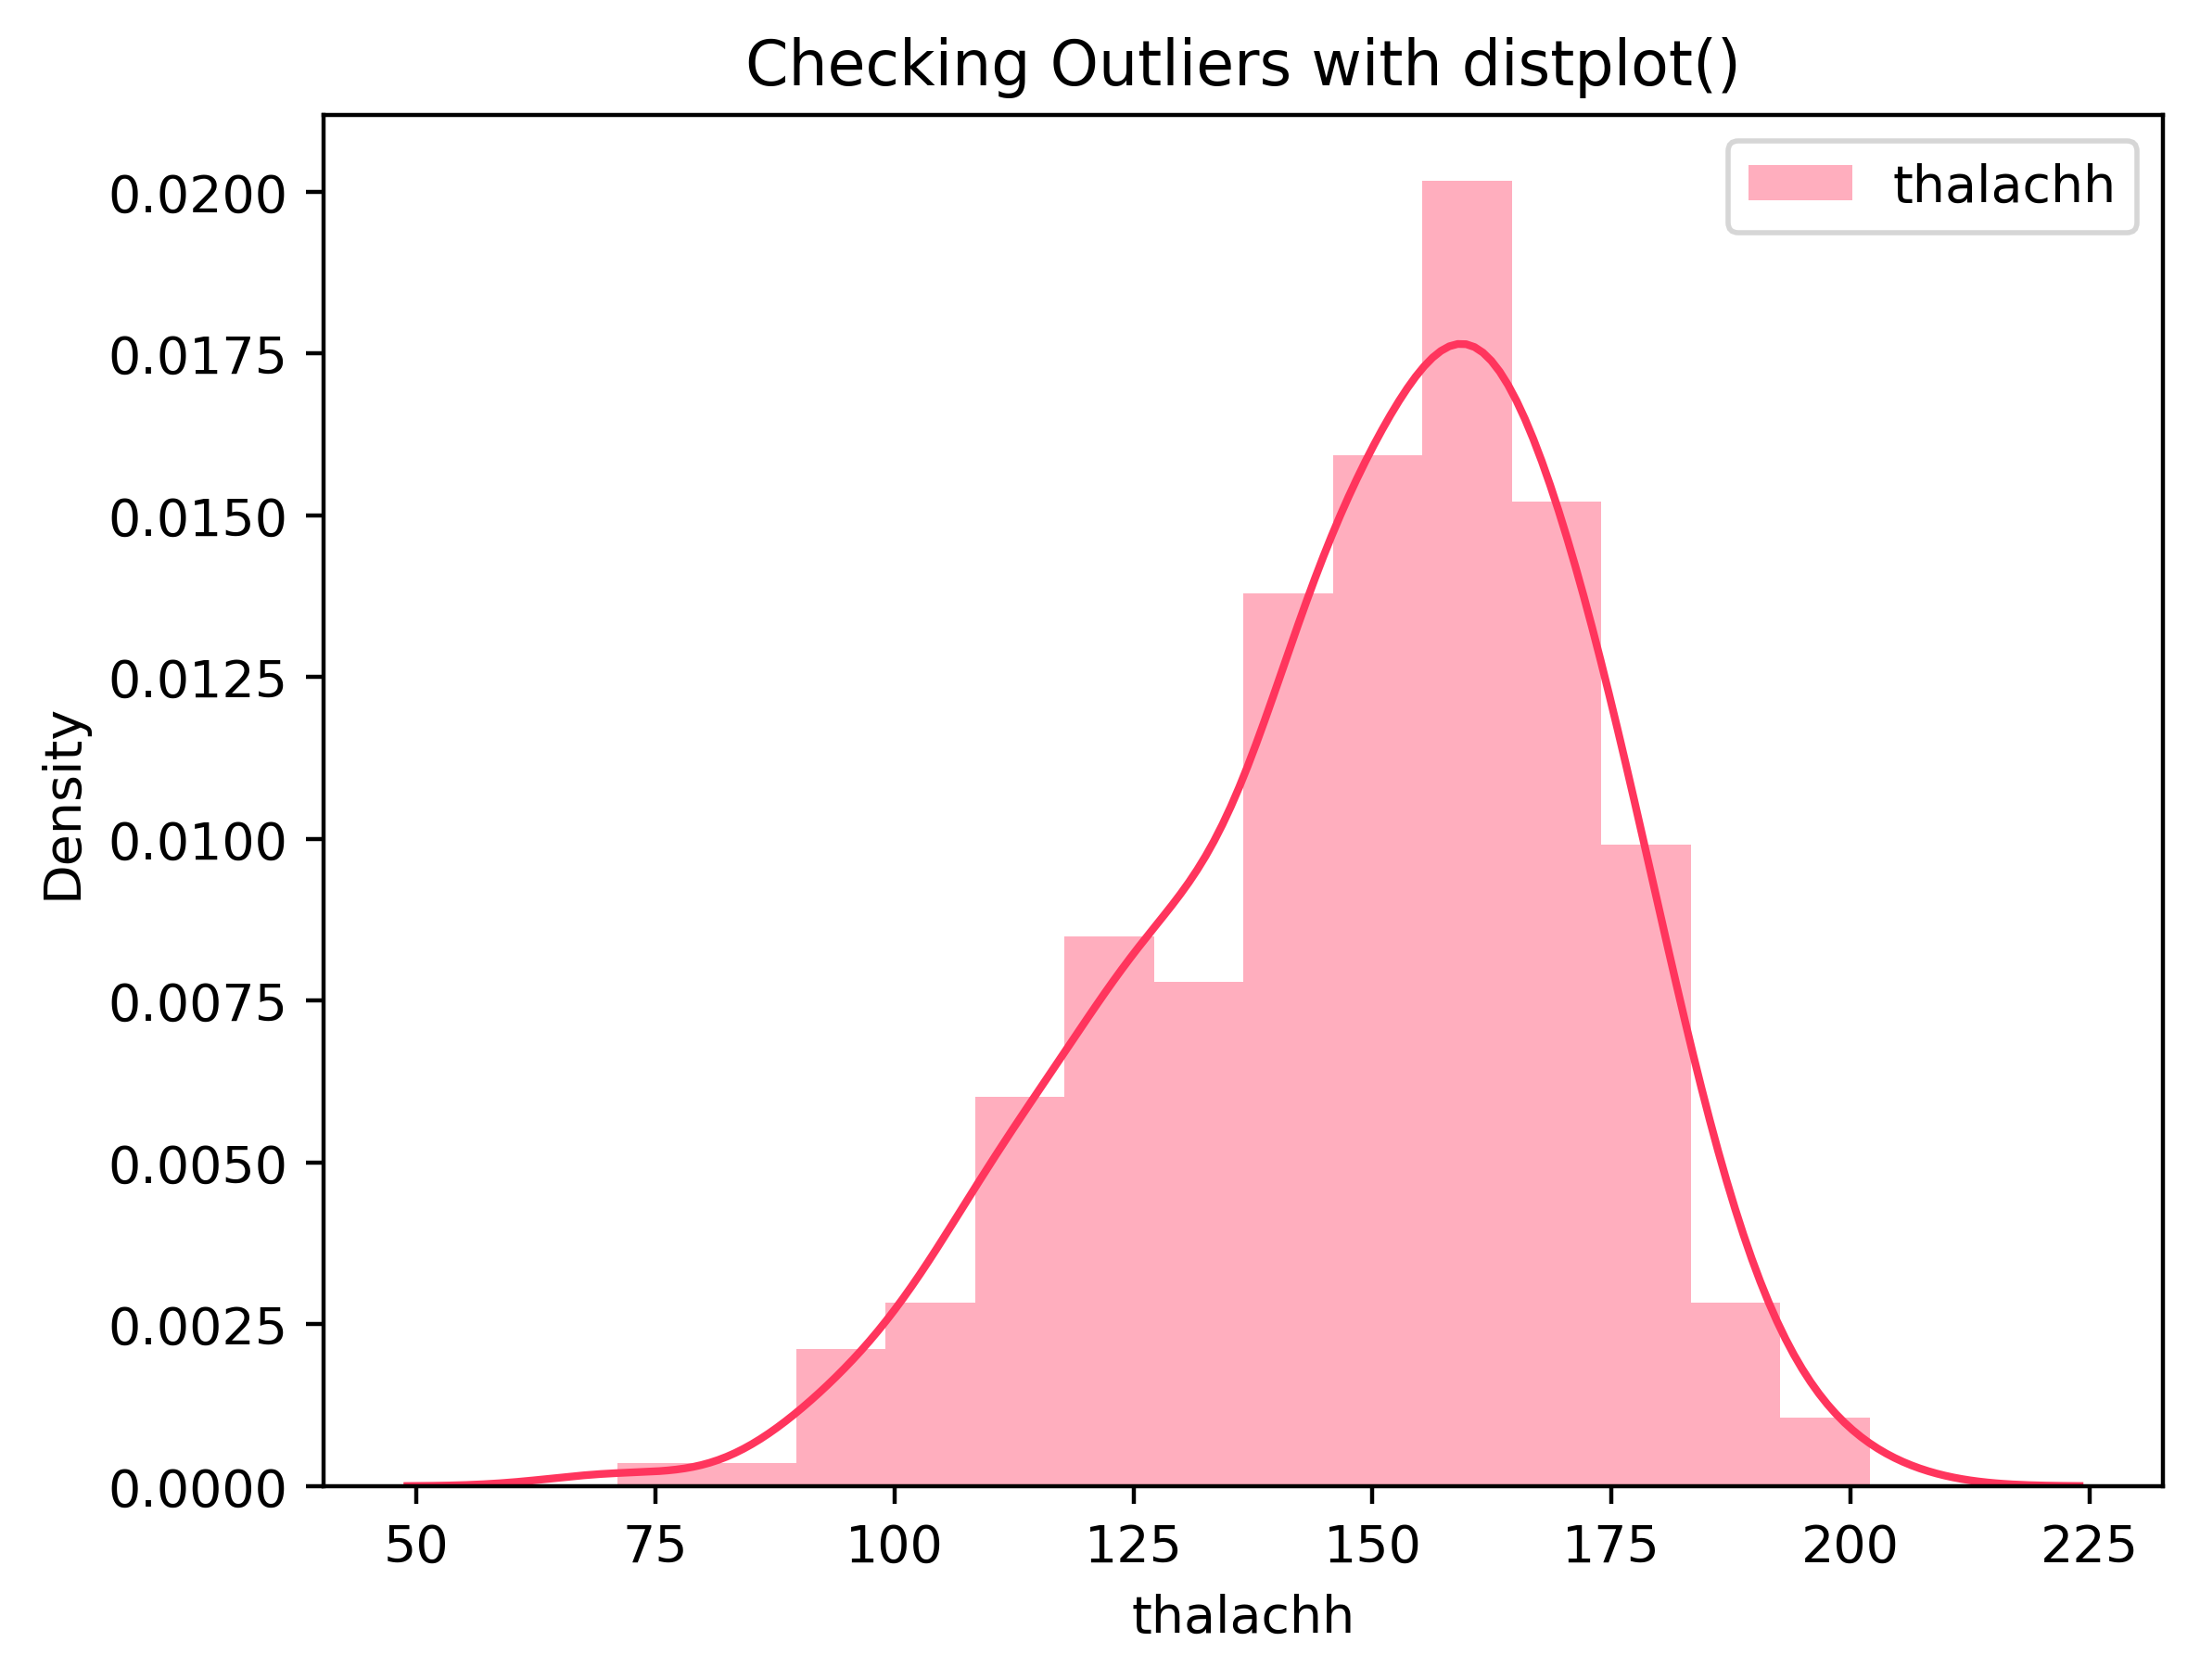

In [25]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

**Observations:**

trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.

In case of thalachh the data is highly skewed towards right!

In [27]:
sns.pairplot(df,kind="kde",hue="output")

In [28]:
#spliting data into X and y

X=df.drop(["output"],axis=1)
y=df["output"]

using minmax Scaler for scaling the data in same Scale we scal the aal data between 0 to 1

In [30]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# **Model Building**

In [31]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [32]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pre=ada.predict(X_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.7868852459016393

In [34]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [35]:
predicted =[]

In [36]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8032786885245902
KNeighborsClassifier 0.819672131147541
SVC 0.7540983606557377
DecisionTreeClassifier 0.6557377049180327
RandomForestClassifier 0.7868852459016393
GradientBoostingClassifier 0.6885245901639344
XGBClassifier 0.7540983606557377


<Axes: >

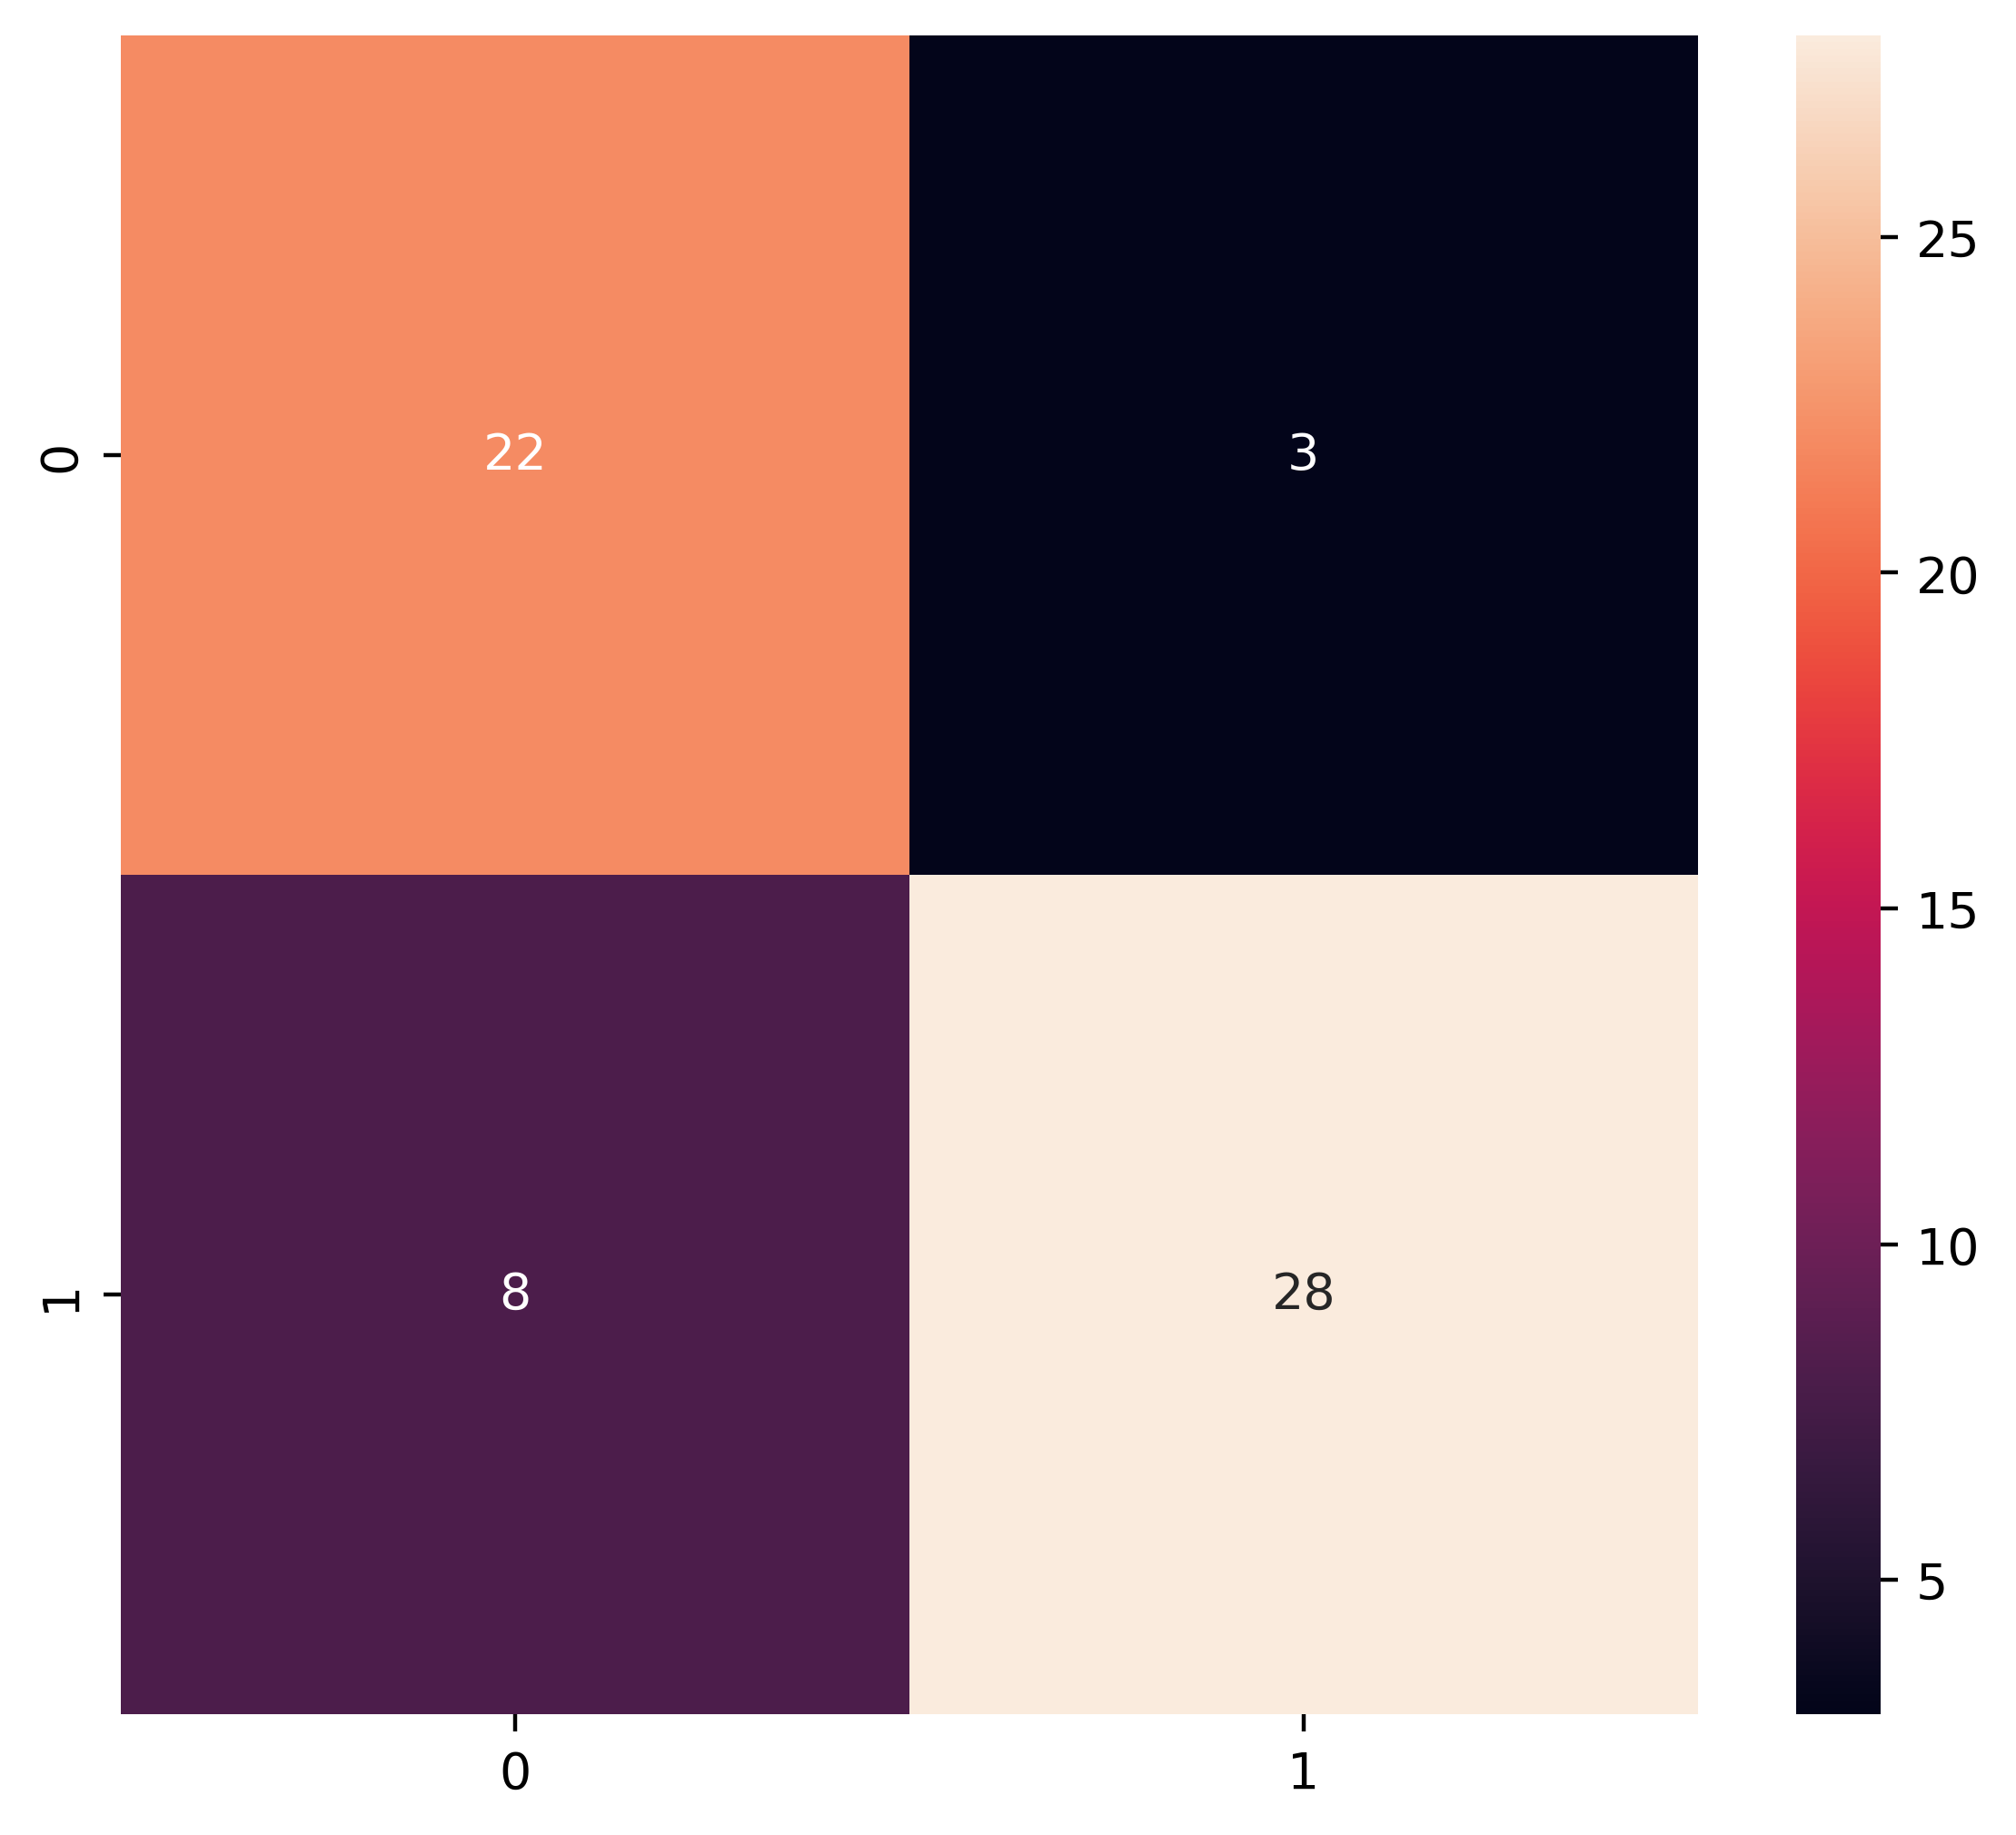

In [37]:
#confusion matrix
cnn=KNeighborsClassifier()
cnn.fit(X_train,y_train)
cnn_predict = cnn.predict(X_test)
cf_matrix=confusion_matrix(y_test,cnn_predict)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')

<Axes: >

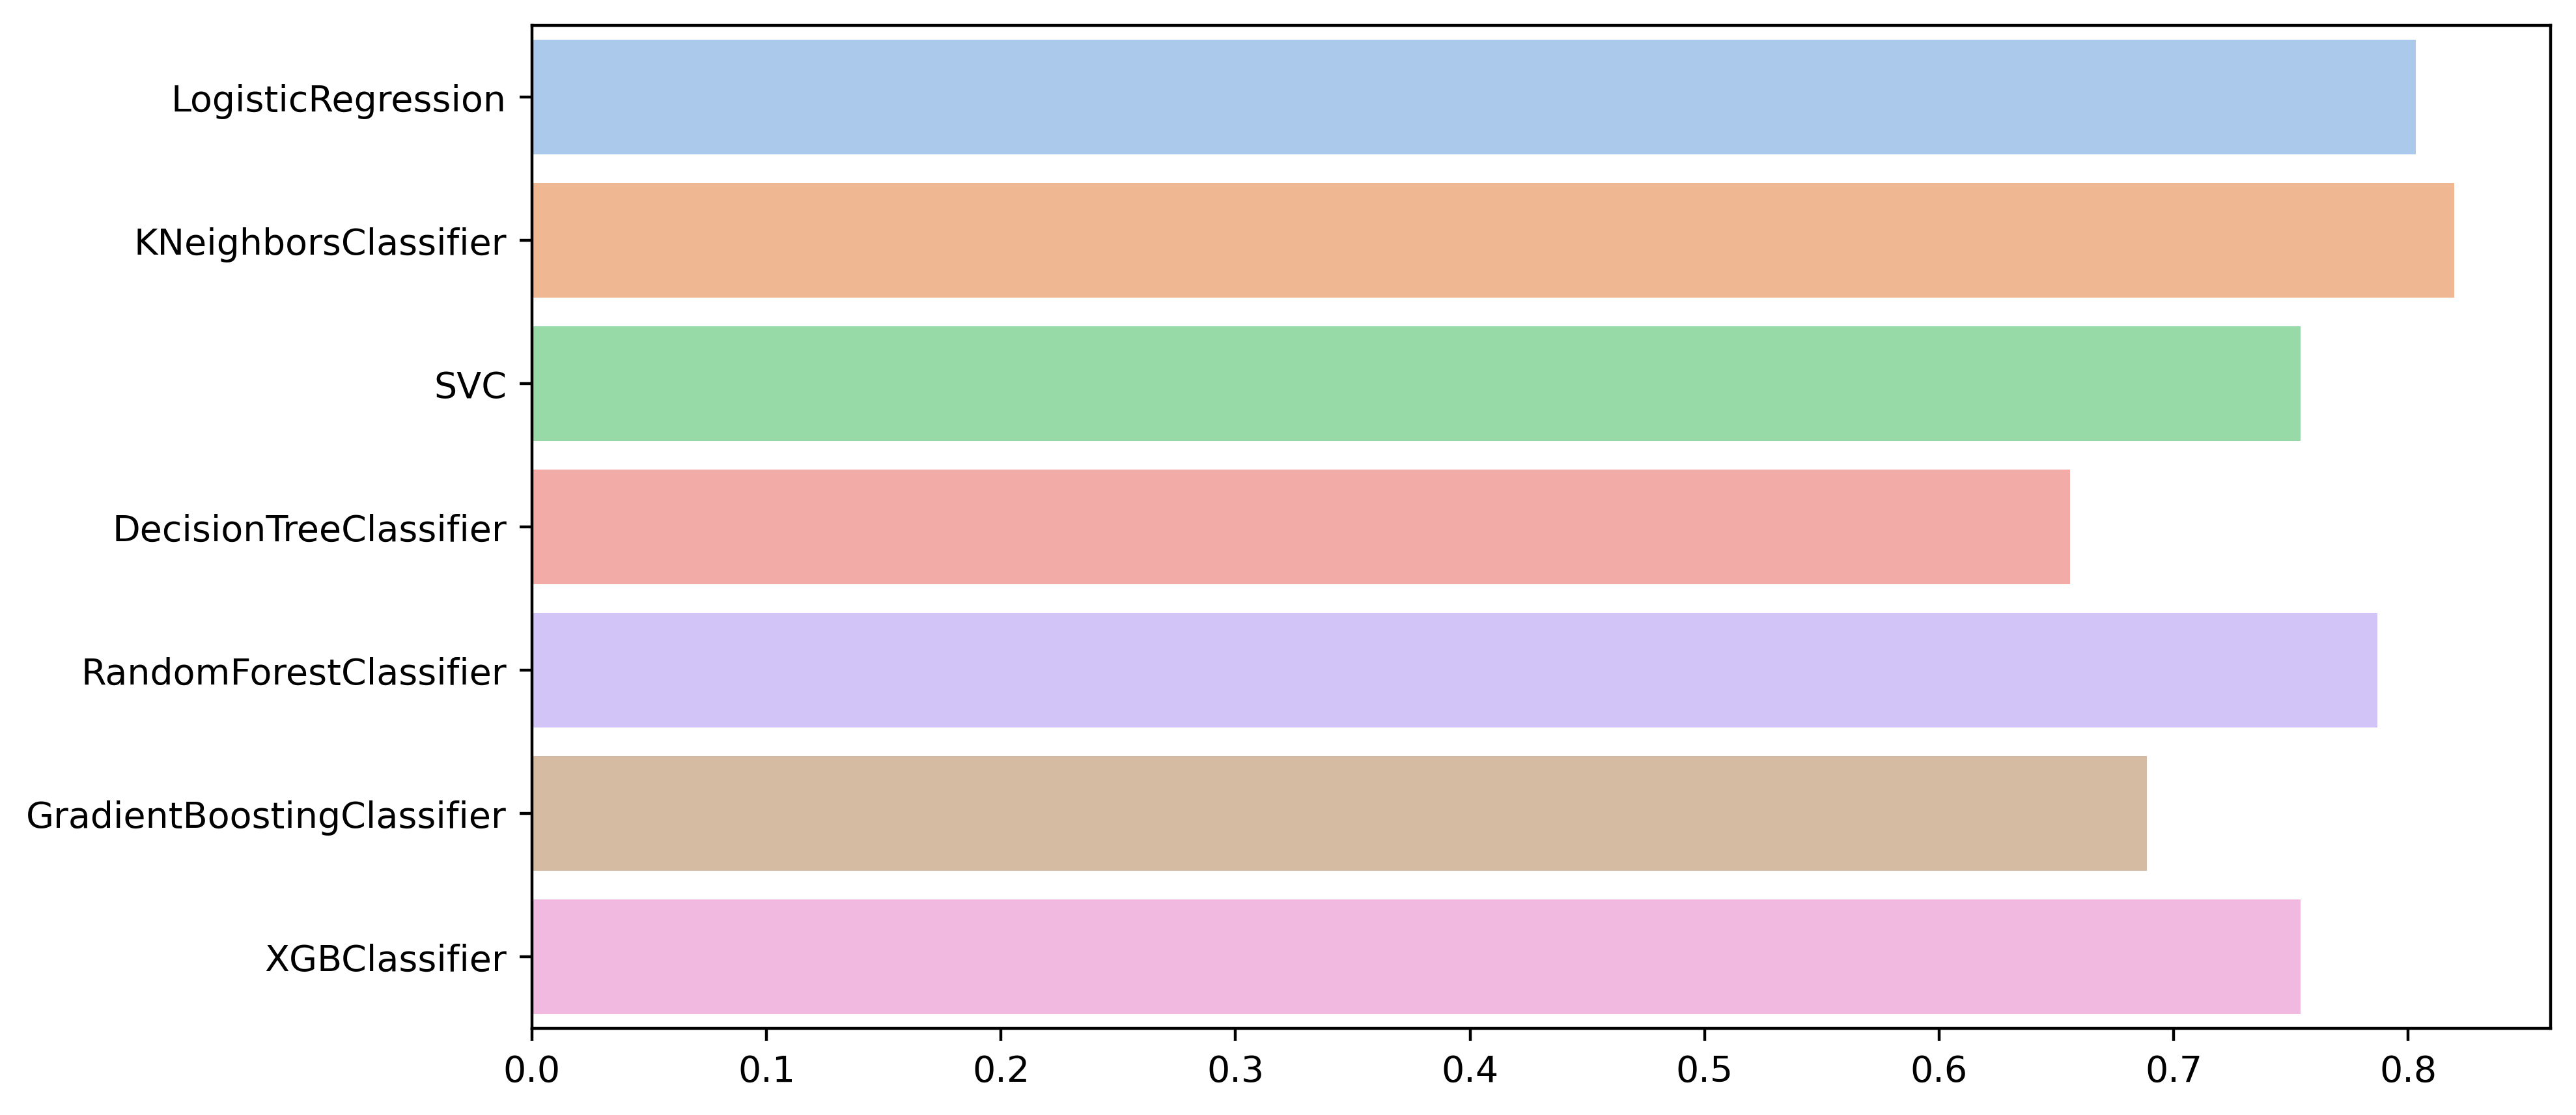

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')

**Observation:**

From the above figure we can see that KNeighborsClassifier model give an accuracy greater than 90%.

**Conclusion:**

Numeric Variables - No outliers were found!

High Blood Pressure, High Cholestrol and High Heart Rate leads to high chance of heart attack.

In the count of target showed up that we have more chance of heart attack details.

Age from 40-60 years have the high chance of heart attack.

Male gender has more chance of heart attack compared to female ones.

Highly Correlated factors in this dataset are :

Age and trtbps (blood pressure rate)
Age and chol (cholestrol level)